In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
playstore = pd.read_csv('googleplaystore.csv')

In [3]:
# 13.5% of google apps are null
(playstore.isnull().sum()/playstore.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

# Rating Percentages

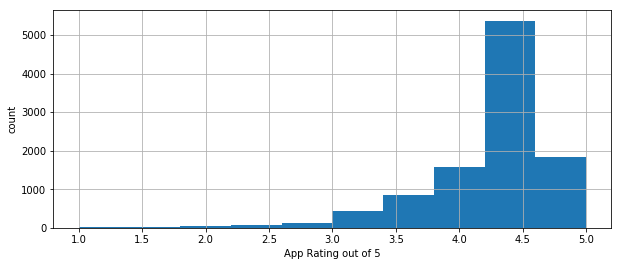

In [31]:
plt.figure(figsize=(10,4))
playstore['Rating'].hist(bins=10)
plt.xlabel('App Rating out of 5')
plt.ylabel('count')
plt.show()

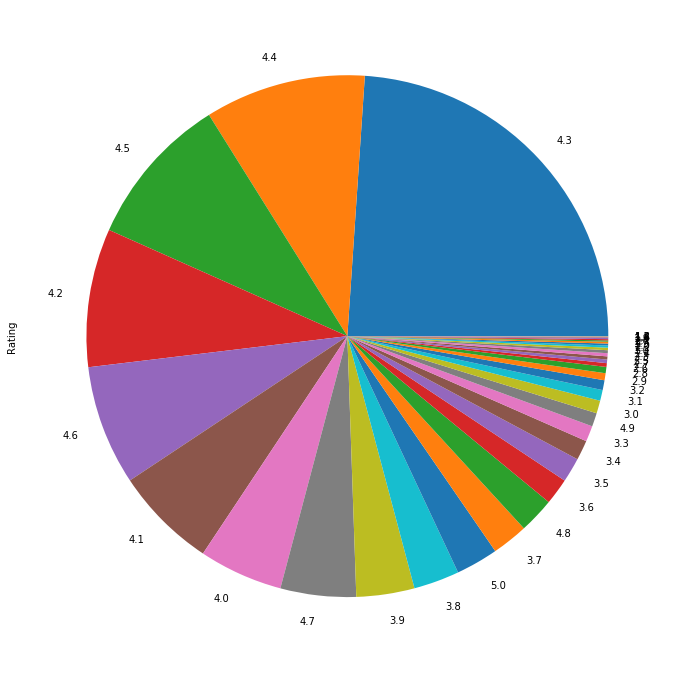

In [32]:
playstore['Rating'].value_counts().plot(kind='pie')
plt.show()

## ~24% of apps are rated 4.3 out of 5

In [6]:
(playstore['Rating'].value_counts()/playstore.shape[0])*100
# playstore['Rating'].value_counts()

4.4     10.229684
4.3      9.925284
4.5      9.574762
4.2      8.781478
4.6      7.591551
4.1      6.530763
4.0      5.239369
4.7      4.602896
3.9      3.560557
3.8      2.794945
5.0      2.527442
3.7      2.204594
4.8      2.158472
3.6      1.605018
3.5      1.503551
3.4      1.180703
3.3      0.940873
4.9      0.802509
3.0      0.765612
3.1      0.636473
3.2      0.590351
2.9      0.415091
2.8      0.387418
2.6      0.230606
2.7      0.230606
2.5      0.193709
2.3      0.184485
2.4      0.175261
1.0      0.147588
2.2      0.129139
1.9      0.119915
2.0      0.110691
2.1      0.073794
1.7      0.073794
1.8      0.073794
1.6      0.036897
1.4      0.027673
1.5      0.027673
1.2      0.009224
19.0     0.009224
Name: Rating, dtype: float64

In [7]:
# cleaning of rating data
t_data=playstore[pd.notnull(playstore['Rating'])]

# rating is right skewed so take median in place of nan
median=np.median(t_data['Rating'])
playstore['Rating'].fillna(median,inplace=True)

# In other features missing value % is not considrable so drop nan
playstore.dropna(inplace=True)

In [8]:
# remove duplicate rows
playstore.drop_duplicates(inplace=True)
playstore.reset_index(inplace=True)

In [9]:
eliminate_cols = ['index', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
playstore.drop(eliminate_cols, inplace=True, axis=1)

In [10]:
playstore['Installs'] = playstore['Installs'].str.replace(',','').str.replace('+','').astype('int')
playstore['Reviews']  = playstore['Reviews'].astype('int')
playstore['Size']     = playstore['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
playstore['Price']    = playstore['Price'].str.replace('$','').astype('float')

In [11]:
playstore.head()
# playstore[playstore.duplicated() == True]
# playstore.info()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone


In [12]:
playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,10346.00000,1.034600e+04,1.034600e+04,1.034600e+04,10346.000000
mean,4.20377,4.063338e+05,1.816602e+07,1.417266e+07,1.031561
std,0.48573,2.698179e+06,2.214556e+07,8.028090e+07,16.287252
min,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.10000,3.200000e+01,2.700000e+06,1.000000e+03,0.000000
50%,4.30000,1.688500e+03,9.100000e+06,1.000000e+05,0.000000
75%,4.50000,4.659825e+04,2.600000e+07,1.000000e+06,0.000000
max,5.00000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


# Popular App Categories

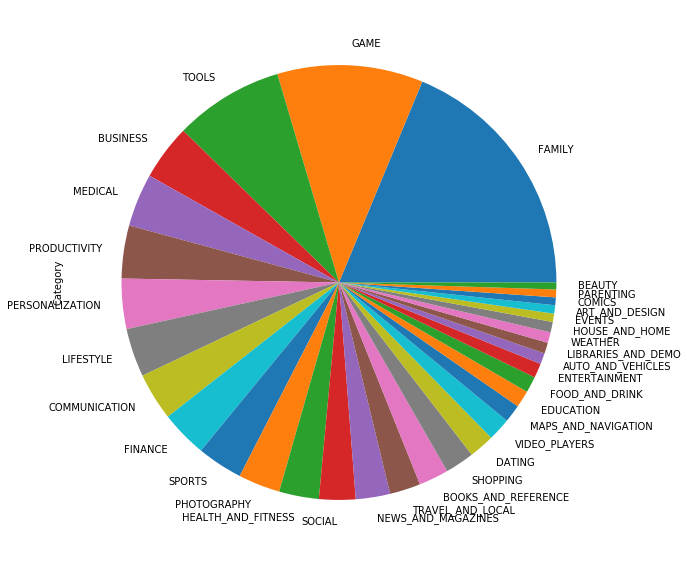

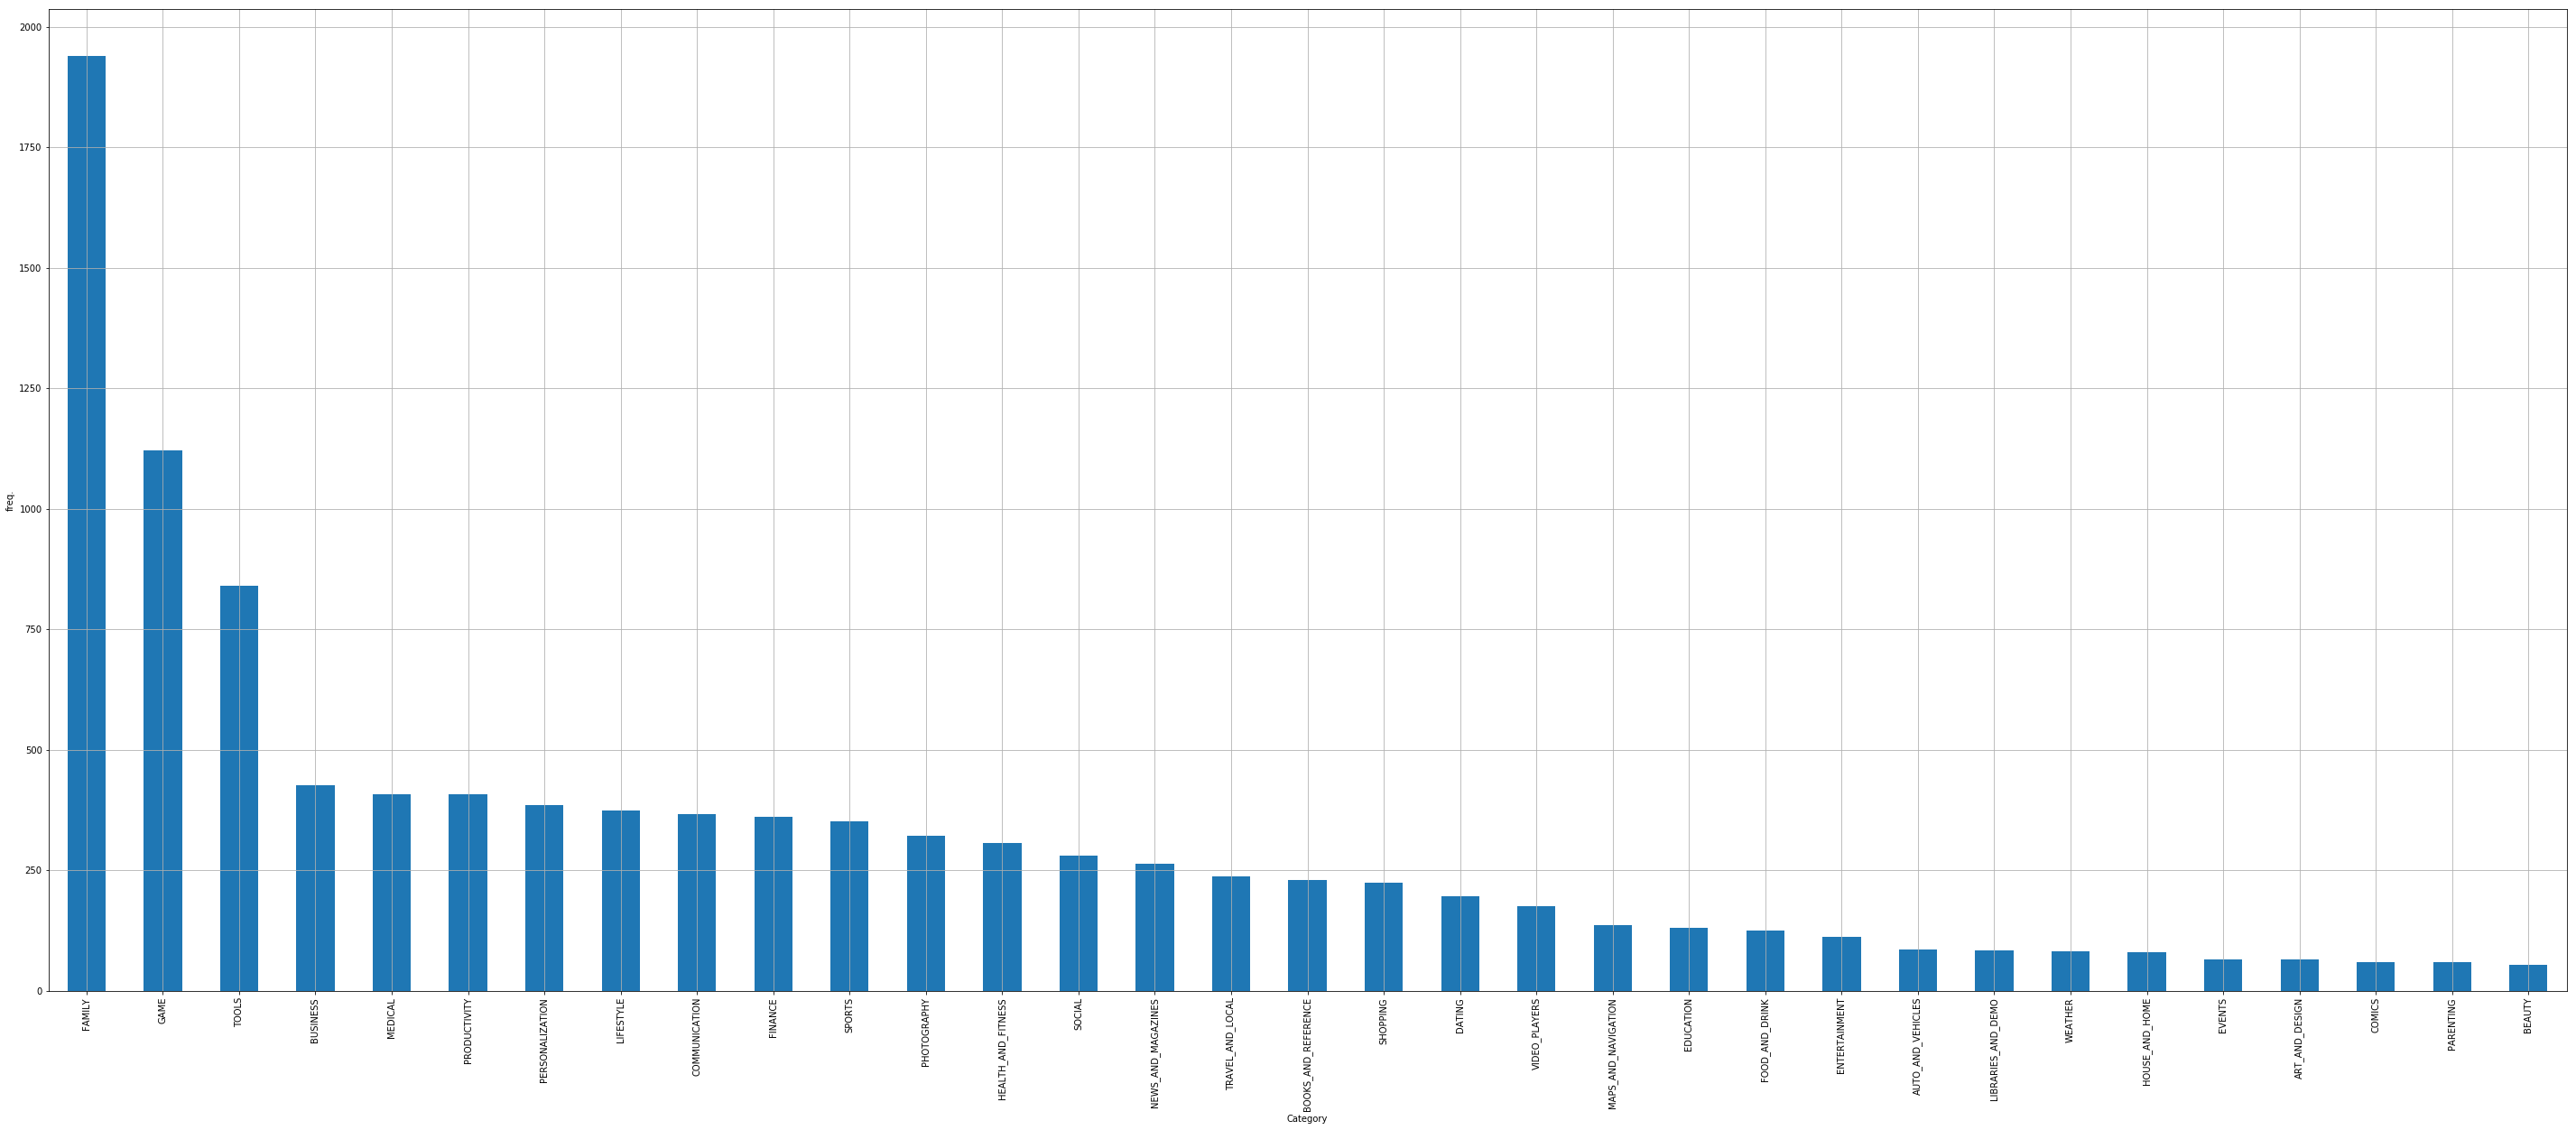

In [13]:
plt.figure(figsize=(40,10))
playstore['Category'].value_counts().plot(kind='pie')
plt.show()

plt.figure(figsize=(50,20))
playstore['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

# most reviewed apps

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

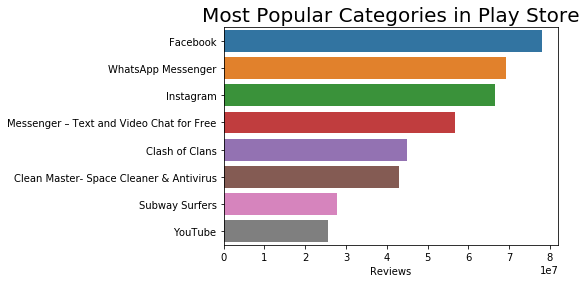

In [14]:
sorted = playstore.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorted )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [15]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone


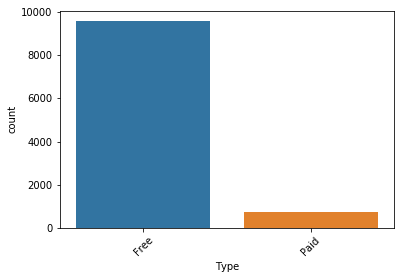

In [16]:
sns.countplot(x='Type', data=playstore)
plt.rcParams["figure.figsize"] = (40,12)
plt.xticks(rotation=45) 
plt.show()

In [17]:
# % of free apps
(len(playstore[playstore['Type'] == 'Free'])/playstore.shape[0])*100

92.63483471873187

In [18]:
avg_rating_free_apps = playstore[playstore['Type'] == 'Free']['Rating'].mean()
print('Average Rating of Free Apps:',avg_rating_free_apps)

avg_rating_paid_apps = playstore[playstore['Type'] == 'Paid']['Rating'].mean()
print('Average Rating of Paid Apps:',avg_rating_paid_apps)

Average Rating of Free Apps: 4.1985601001670085
Average Rating of Paid Apps: 4.269291338582688


## observation: even though avg rating of paid apps is higher, it is important to note almost 93% of apps are free

# Model Training

In [19]:
X = playstore[['Category','Reviews','Size','Installs','Type','Price','Content Rating']]
y = playstore[['Rating']]

In [20]:
## one-hot encoding of Category,Content Rating,Type,Genres
encoded_x=pd.get_dummies(X, columns=['Category','Content Rating','Type'])

In [21]:
train_X, val_X, train_y, val_y = train_test_split(encoded_x, y, random_state = 0)

In [25]:
model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
model.fit(train_X, train_y)

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [26]:
model.score(val_X, val_y)

/home/ec2-user/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.01702174256039468

/home/ec2-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


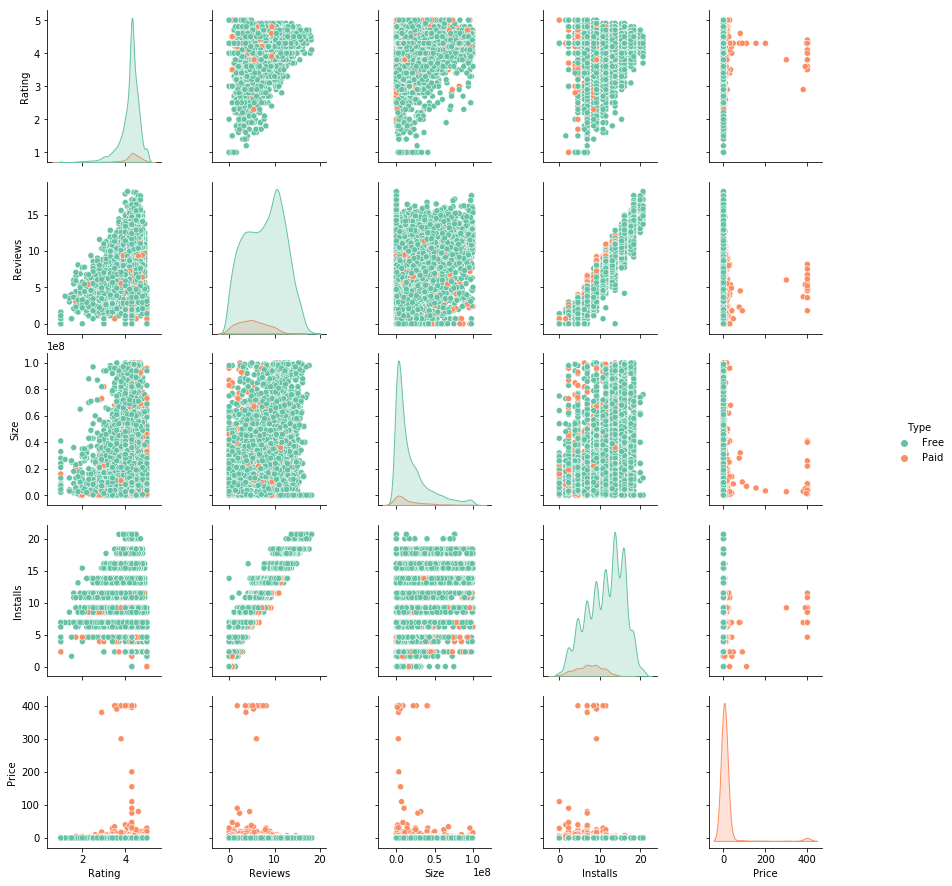

In [24]:
Rating = playstore['Rating']
Size = playstore['Size']
Installs = playstore['Installs']
Reviews = playstore['Reviews']
Type = playstore['Type']
Price = playstore['Price']

plotgraph = sns.pairplot(pd.DataFrame(list(zip(Rating, np.log(Reviews), Size, np.log(Installs), Price, Type)), 
                        columns=['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Type']), hue='Type', palette="Set2")

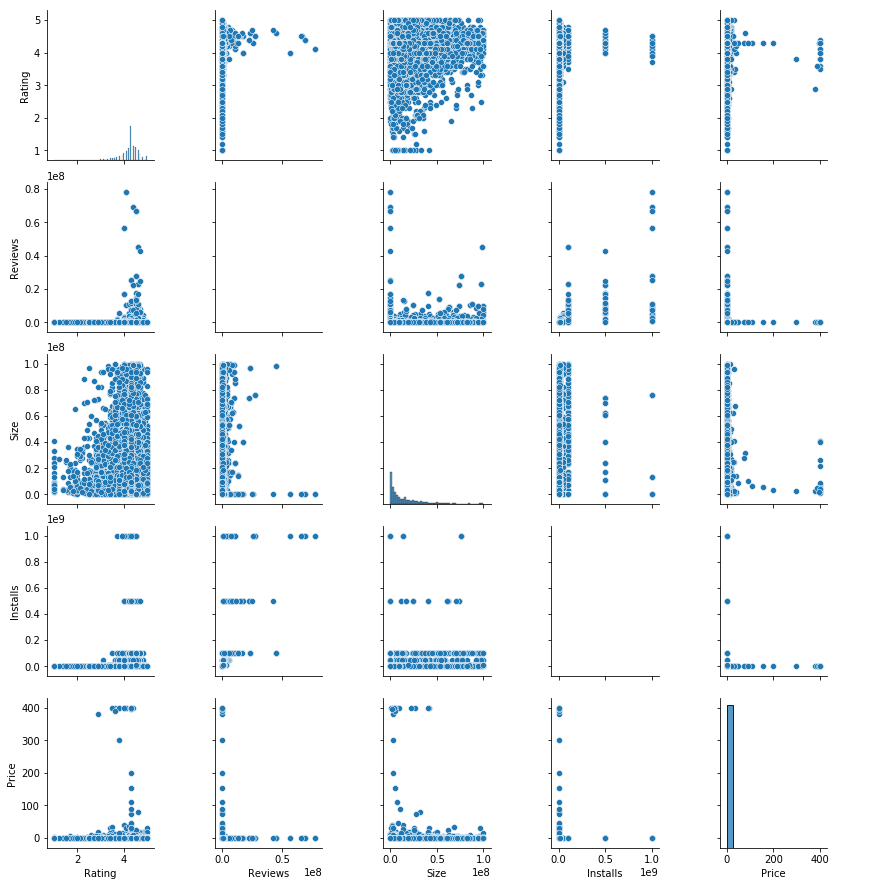

In [27]:
sns.pairplot(playstore)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

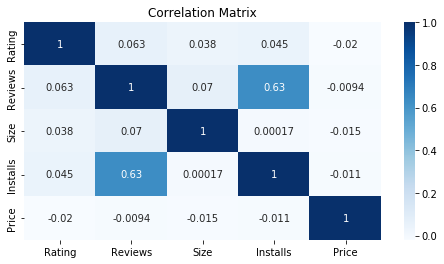

In [29]:
plt.figure(figsize=(8,4))
sns.heatmap(playstore.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')